<a href="https://colab.research.google.com/github/dhyannn/ML-LAB/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [10]:
df=pd.read_csv("Market_Basket.csv")
df.head()

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,Item 11,Item 12,Item 13,Item 14,Item 15,Item 16,Item 17,Item 18,Item 19,Item 20
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
x=df['Item 1'].value_counts().sort_values(ascending=False)[:10]
x

mineral water        577
burgers              576
turkey               458
chocolate            391
frozen vegetables    373
spaghetti            354
shrimp               325
grated cheese        293
eggs                 279
cookies              270
Name: Item 1, dtype: int64

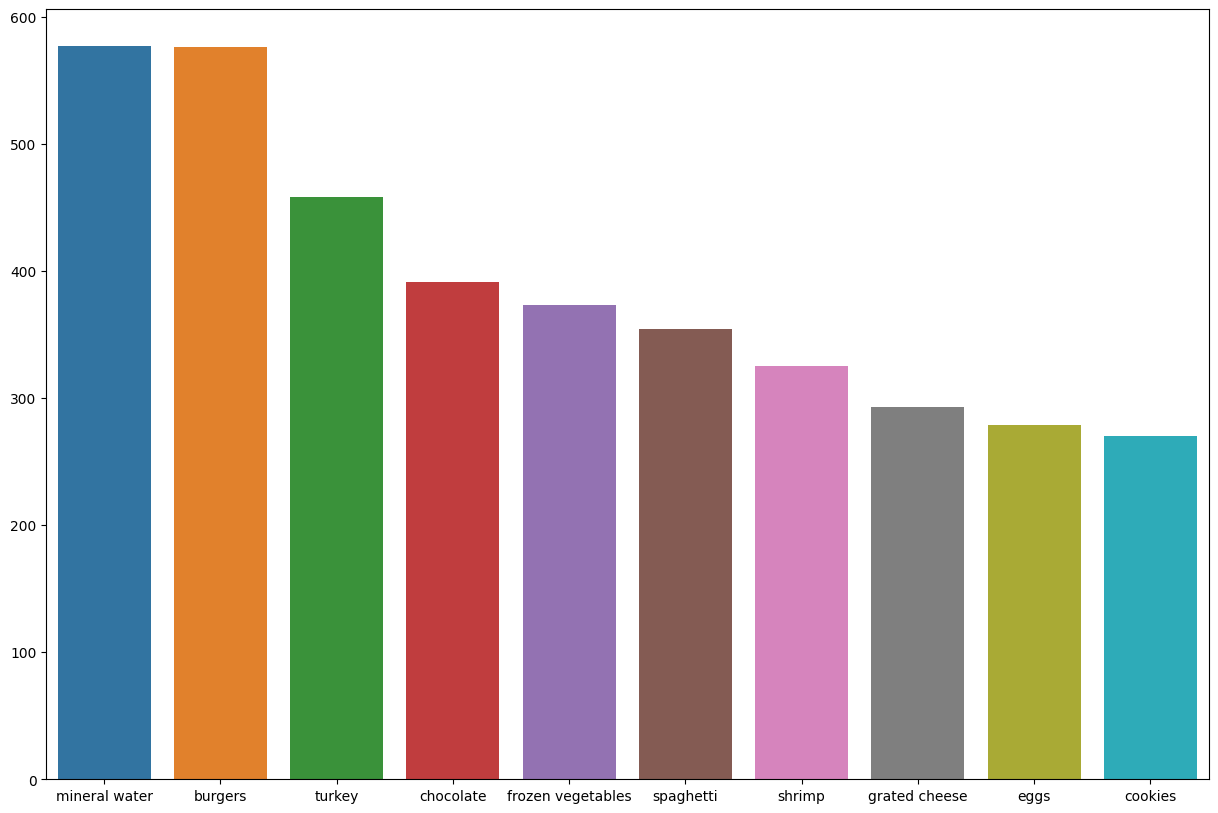

In [12]:
plt.figure(figsize=(15, 10))
sns.barplot(x=x.index,y=x.values)
plt.show()

In [13]:
df.describe()

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,Item 11,Item 12,Item 13,Item 14,Item 15,Item 16,Item 17,Item 18,Item 19,Item 20
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,97,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [14]:
df.value_counts()

Item 1  Item 2   Item 3   Item 4          Item 5        Item 6            Item 7  Item 8          Item 9        Item 10       Item 11         Item 12    Item 13  Item 14  Item 15        Item 16  Item 17            Item 18          Item 19  Item 20  
shrimp  almonds  avocado  vegetables mix  green grapes  whole weat flour  yams    cottage cheese  energy drink  tomato juice  low fat yogurt  green tea  honey    salad    mineral water  salmon   antioxydant juice  frozen smoothie  spinach  olive oil    1
dtype: int64

In [15]:
df.isna()

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,Item 11,Item 12,Item 13,Item 14,Item 15,Item 16,Item 17,Item 18,Item 19,Item 20
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
7497,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True
7498,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
7499,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [16]:
df.fillna(value=0)

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,Item 11,Item 12,Item 13,Item 14,Item 15,Item 16,Item 17,Item 18,Item 19,Item 20
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7498,chicken,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7499,escalope,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
data=df.drop(columns = ['Item 20'])
data

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,Item 11,Item 12,Item 13,Item 14,Item 15,Item 16,Item 17,Item 18,Item 19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
transactions = []

for i in range(0, data.shape[0]):
    transaction = [str(data.values[i, j]) for j in range(0, data.shape[1]) if str(data.values[i, j]) != '0']
    transactions.append(transaction)

print(transactions)

[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach'], ['burgers', 'meatballs', 'eggs', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['chutney', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['turkey', 'avocado', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['low fat yogurt', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'na

In [19]:
unique_items_set = set()
for transaction in transactions:
    unique_items_set.update(item for item in transaction)
unique_items_list = list(unique_items_set)

In [20]:
binary_matrix = pd.DataFrame(columns=unique_items_list)
data = []
for transaction in transactions:
    row = [1 if item in transaction else 0 for item in unique_items_list]
    data.append(row)

binary_matrix = pd.concat([binary_matrix, pd.DataFrame(data, columns=unique_items_list)], ignore_index=True)

print(binary_matrix)

     fromage blanc cereals yogurt cake muffins escalope white wine avocado  \
0                0       0           0       0        0          0       1   
1                0       0           0       0        0          0       0   
2                0       0           0       0        0          0       0   
3                0       0           0       0        0          0       1   
4                0       0           0       0        0          0       0   
...            ...     ...         ...     ...      ...        ...     ...   
7496             0       0           0       0        0          0       0   
7497             0       0           0       0        0          0       0   
7498             0       0           0       0        0          0       0   
7499             0       0           0       0        1          0       0   
7500             0       0           1       0        0          0       0   

     soda salt chicken  ... bramble chocolate green grapes panc

In [21]:
top10=binary_matrix.sum().sort_values(ascending=False)[:10]
top10

nan                  7498
mineral water        1788
eggs                 1348
spaghetti            1306
french fries         1282
chocolate            1229
green tea             991
milk                  972
ground beef           737
frozen vegetables     715
dtype: object

In [22]:
frequent_itemset = apriori(binary_matrix,min_support=0.06,use_colnames=True)
rules = association_rules(frequent_itemset,metric='lift',min_threshold=1)

In [23]:
basket=pd.DataFrame(binary_matrix)
frequent_itemset = apriori(basket,min_support=0.03,use_colnames=True)
rules = association_rules(frequent_itemset,metric='lift',min_threshold=1)
rules.head()
rules[(rules['confidence']>0.2) & (rules['lift']>1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(escalope),(nan),0.079323,0.999600,0.079323,1.000000,1.000400,0.000032,inf,0.000434
3,(chicken),(nan),0.059992,0.999600,0.059992,1.000000,1.000400,0.000024,inf,0.000425
5,(milk),(eggs),0.129583,0.179709,0.030796,0.237654,1.322437,0.007509,1.076009,0.280119
6,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650,0.409465
7,(mineral water),(milk),0.238368,0.129583,0.047994,0.201342,1.553774,0.017105,1.089850,0.467950
...,...,...,...,...,...,...,...,...,...,...
154,"(chocolate, nan)",(french fries),0.163712,0.170911,0.034395,0.210098,1.229285,0.006415,1.049610,0.223032
155,"(chocolate, french fries)",(nan),0.034395,0.999600,0.034395,1.000000,1.000400,0.000014,inf,0.000414
156,"(nan, french fries)",(chocolate),0.170777,0.163845,0.034395,0.201405,1.229243,0.006414,1.047033,0.224899
157,(chocolate),"(nan, french fries)",0.163845,0.170777,0.034395,0.209927,1.229243,0.006414,1.049552,0.223034


In [24]:
worst_choice=rules.sort_values(by='lift',ascending=True)
print('Worst choice to buy items together')
print(worst_choice[['antecedents','consequents','lift']])

Worst choice to buy items together
            antecedents         consequents      lift
0                 (nan)          (escalope)  1.000400
69   (whole wheat rice)               (nan)  1.000400
68                (nan)  (whole wheat rice)  1.000400
67        (cooking oil)               (nan)  1.000400
66                (nan)       (cooking oil)  1.000400
..                  ...                 ...       ...
144  (ground beef, nan)         (spaghetti)  2.291162
35          (spaghetti)       (ground beef)  2.291162
149         (spaghetti)  (ground beef, nan)  2.291162
147       (ground beef)    (nan, spaghetti)  2.292918
146    (nan, spaghetti)       (ground beef)  2.292918

[160 rows x 3 columns]


In [25]:
best_choice = rules.sort_values(by=['confidence', 'lift'], ascending=[False, False])
print('Best choice to buy items together')
print(best_choice[['antecedents', 'consequents', 'confidence','lift']])

Best choice to buy items together
     antecedents                consequents  confidence    lift
1     (escalope)                      (nan)    1.000000  1.0004
3      (chicken)                      (nan)    1.000000  1.0004
19        (eggs)                      (nan)    1.000000  1.0004
23   (champagne)                      (nan)    1.000000  1.0004
41    (tomatoes)                      (nan)    1.000000  1.0004
..           ...                        ...         ...     ...
141        (nan)  (pancakes, mineral water)    0.033742  1.0004
112        (nan)          (chocolate, eggs)    0.033209  1.0004
55         (nan)                 (hot dogs)    0.032409  1.0004
73         (nan)               (eggs, milk)    0.030808  1.0004
51         (nan)                   (butter)    0.030141  1.0004

[160 rows x 4 columns]


In [26]:
top=best_choice.head(10)
print(top)

        antecedents consequents  antecedent support  consequent support  \
1        (escalope)       (nan)            0.079323              0.9996   
3         (chicken)       (nan)            0.059992              0.9996   
19           (eggs)       (nan)            0.179709              0.9996   
23      (champagne)       (nan)            0.046794              0.9996   
41       (tomatoes)       (nan)            0.068391              0.9996   
43  (herb & pepper)       (nan)            0.049460              0.9996   
44         (turkey)       (nan)            0.062525              0.9996   
47        (burgers)       (nan)            0.087188              0.9996   
48        (cookies)       (nan)            0.080389              0.9996   
50         (butter)       (nan)            0.030129              0.9996   

     support  confidence    lift  leverage  conviction  zhangs_metric  
1   0.079323         1.0  1.0004  0.000032         inf       0.000434  
3   0.059992         1.0  1.00

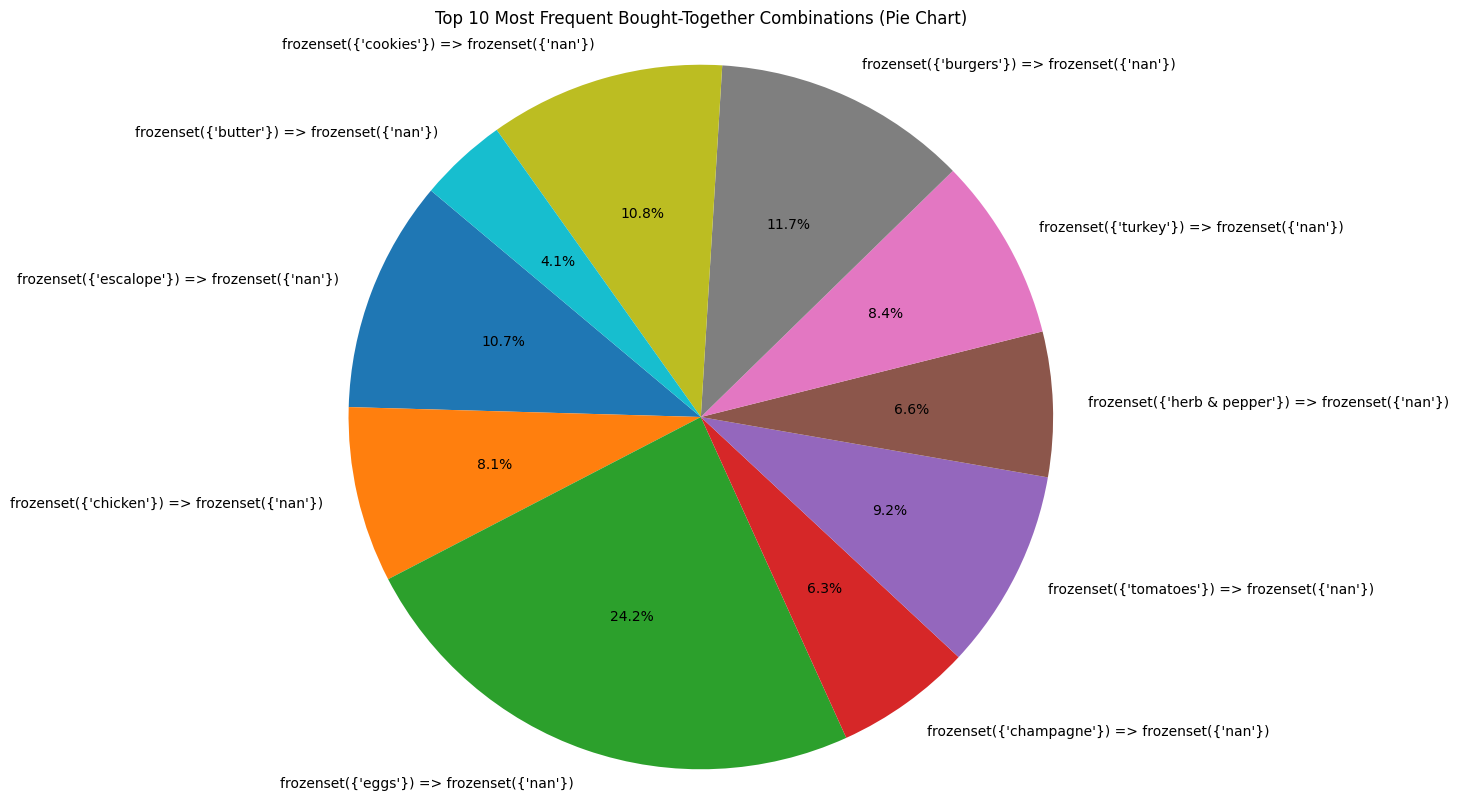

In [27]:
top10 = best_choice.head(10)
combinations = [' => '.join(map(str, combination)) for combination in zip(top10['antecedents'], top10['consequents'])]
support_values = top10['support']

# Create the pie chart
plt.figure(figsize=(10, 10))
plt.pie(support_values, labels=combinations, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Top 10 Most Frequent Bought-Together Combinations (Pie Chart)')
plt.show()